In [602]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Matplotlib.dates provides date plotting capabilities
import matplotlib.dates as mdates

In [603]:
#Read in the CSV
data = 'owid-covid-data.csv'
covid_data = pd.read_csv(data)

# Fill Missing Data with 0
covid_data = covid_data.fillna(0)

In [604]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0


# Identify The Most Populated Country From Each Continent

In [605]:
# Select Required Columns
population_data = covid_data[['continent','location','population' ]]

In [606]:
# Drop Dulicate Population Values
population_data = population_data.drop_duplicates(subset=['population'])

# Sort Population Collumn by Value 
population_data = population_data.sort_values(by='population', ascending=False)

In [607]:
# display one row only COMMENTED OUT AFTER RUNNING CELLS 
pd.set_option('display.max_rows', 1) 

In [608]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Africa = population_data['continent'] == 'Africa'

Covid_Data_Africa = population_data[Covid_Data_Africa]
Covid_Data_Africa

,continent,location,population
135413,Africa,Nigeria,213401323.0


In [609]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Asia = population_data['continent'] == 'Asia'

Covid_Data_Asia = population_data[Covid_Data_Asia]
Covid_Data_Asia

,continent,location,population
38236,Asia,China,1.425893e+09


In [610]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Europe = population_data['continent'] == 'Europe'

Covid_Data_Europe = population_data[Covid_Data_Europe]
Covid_Data_Europe

,continent,location,population
153934,Europe,Russia,145102755.0


In [611]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_NorthAmerica = population_data['continent'] == 'North America'

Covid_Data_NorthAmerica = population_data[Covid_Data_NorthAmerica]
Covid_Data_NorthAmerica

,continent,location,population
195365,North America,United States,336997624.0


In [612]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_SouthAmerica = population_data['continent'] == 'South America'

Covid_Data_SouthAmerica = population_data[Covid_Data_SouthAmerica]
Covid_Data_SouthAmerica

,continent,location,population
25828,South America,Brazil,214326223.0


In [613]:
# Create Subset of data with individual continent data to Identify the Most Populated Country
Covid_Data_Oceania = population_data['continent'] == 'Oceania'

Covid_Data_Oceania = population_data[Covid_Data_Oceania]
Covid_Data_Oceania

,continent,location,population
10780,Oceania,Australia,25921089.0


# Select New Collumns

In [614]:
covid_data = covid_data[['new_deaths_smoothed_per_million', 'new_cases_smoothed', 'continent', 'location', 'date', 'population', 'total_cases', 'total_tests', 'positive_rate', 'total_vaccinations', 'people_fully_vaccinated' ]]
covid_data.head()

,new_deaths_smoothed_per_million,new_cases_smoothed,continent,location,date,population,total_cases,total_tests,positive_rate,total_vaccinations,people_fully_vaccinated
0,0.0,0.0,Asia,Afghanistan,2020-02-24,40099462.0,5.0,0.0,0.0,0.0,0.0


In [615]:
# Define / Grab the data contained within the "location" column | DataFrames

nigeria = covid_data.loc[(covid_data['location'] == 'Nigeria'),:]
china = covid_data.loc[(covid_data['location'] == 'China'),:]
russia = covid_data.loc[(covid_data['location'] == 'Russia'),:]
united_states = covid_data.loc[(covid_data['location'] == 'United States'),:]
brazil = covid_data.loc[(covid_data['location'] == 'Brazil'),:]
australia = covid_data.loc[(covid_data['location'] == 'Australia'),:]

In [616]:
# Used to have the x axis display Months
    # .astype - Cast a pandas object to a specified dtype
        # (datetime64[ns, tz]) from ASKBCS assistant * could also use ----> to_datetime() <----  

nigeria['date'] = nigeria['date'].astype('datetime64[ns]')
china['date'] = china['date'].astype('datetime64[ns]')
russia['date'] = russia['date'].astype('datetime64[ns]')
united_states['date'] = united_states['date'].astype('datetime64[ns]')
brazil['date'] = nigeria['date'].astype('datetime64[ns]')
australia['date'] = australia['date'].astype('datetime64[ns]')

/Users/liamtwomey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/liamtwomey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/liamtwomey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

# When Was The Vaccine Avaliable For Each Country

In [617]:
# When Was The Vaccine Avaliable For Each Country

# nigeria - March 2021 | 2021-03-15
# china - December 2020 | 2020-12-15
# russia - December 2020 | 2020-12-15
# united_states - December | 2020-12-13
# brazil - Feburary 2021 | ?
# australia - Feburary 2021 | 2021-02-21

In [618]:
# nigeria
nigeria_vacdate = nigeria.loc[(nigeria['total_vaccinations'] > 0), :]
nigeria_vacdate.head()

,new_deaths_smoothed_per_million,new_cases_smoothed,continent,location,date,population,total_cases,total_tests,positive_rate,total_vaccinations,people_fully_vaccinated
135794,0.023,284.143,Africa,Nigeria,2021-03-15,213401323.0,160895.0,1684305.0,0.024,8000.0,0.0


In [619]:
# china
china_vacdate = china.loc[(china['total_vaccinations'] > 0), :]
china_vacdate.head(1) 

,new_deaths_smoothed_per_million,new_cases_smoothed,continent,location,date,population,total_cases,total_tests,positive_rate,total_vaccinations,people_fully_vaccinated
38564,0.0,22.0,Asia,China,2020-12-15,1.425893e+09,93192.0,0.0,0.0,1500000.0,0.0


In [620]:
# russia
russia_vacdate = russia.loc[(russia['total_vaccinations'] > 0), :]
russia_vacdate.head(1) 

,new_deaths_smoothed_per_million,new_cases_smoothed,continent,location,date,population,total_cases,total_tests,positive_rate,total_vaccinations,people_fully_vaccinated
154253,3.678,27164.714,Europe,Russia,2020-12-15,145102755.0,2682866.0,83867186.0,0.0568,28500.0,0.0


In [621]:
# united_states
USA_vacdate = united_states.loc[(united_states['total_vaccinations'] > 0), :]
USA_vacdate.head(1) 

,new_deaths_smoothed_per_million,new_cases_smoothed,continent,location,date,population,total_cases,total_tests,positive_rate,total_vaccinations,people_fully_vaccinated
195691,7.554,218632.571,North America,United States,2020-12-13,336997624.0,16408469.0,227276972.0,0.118,36419.0,7581.0


In [622]:
# brazil
brazil_vacdate = brazil.loc[(brazil['total_vaccinations'] > 0), :]
brazil_vacdate.head(1) 

,new_deaths_smoothed_per_million,new_cases_smoothed,continent,location,date,population,total_cases,total_tests,positive_rate,total_vaccinations,people_fully_vaccinated
26154,4.488,54612.143,South America,Brazil,NaT,214326223.0,8492403.0,30244995.0,0.0,112.0,0.0


In [623]:
# australia
australia_vacdate = australia.loc[(australia['total_vaccinations'] > 0), :]
australia_vacdate.head(1) 

,new_deaths_smoothed_per_million,new_cases_smoothed,continent,location,date,population,total_cases,total_tests,positive_rate,total_vaccinations,people_fully_vaccinated
11172,0.0,4.286,Oceania,Australia,2021-02-21,25921089.0,28930.0,14053806.0,0.0,20.0,0.0


# PLOT: new deaths smoothed per million

In [624]:
nigeria.head

<bound method NDFrame.head of         new_deaths_smoothed_per_million  new_cases_smoothed continent  \
135413                              0.0                 0.0    Africa   
...                                 ...                 ...       ...   

       location       date   population  total_cases  total_tests  \
135413  Nigeria 2020-02-28  213401323.0          1.0          0.0   
...         ...        ...          ...          ...          ...   

        positive_rate  total_vaccinations  people_fully_vaccinated  
135413            0.0                 0.0                      0.0  
...               ...                 ...                      ...  

[893 rows x 11 columns]>

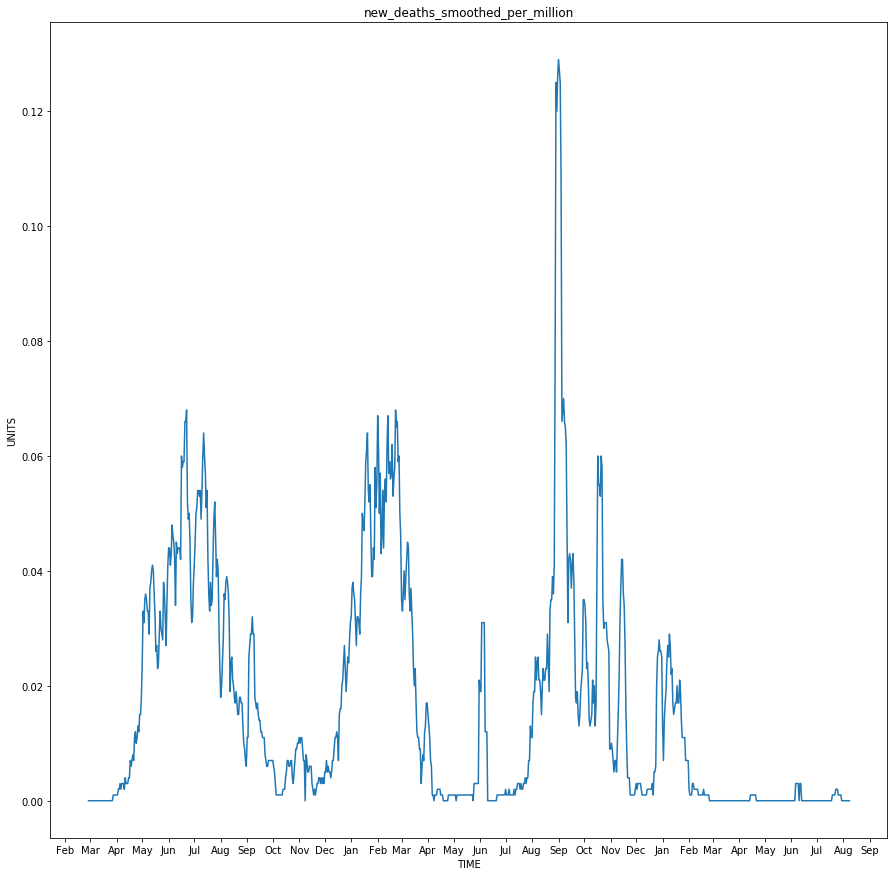

In [625]:
# nigeria
x = nigeria['date']
y = nigeria['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

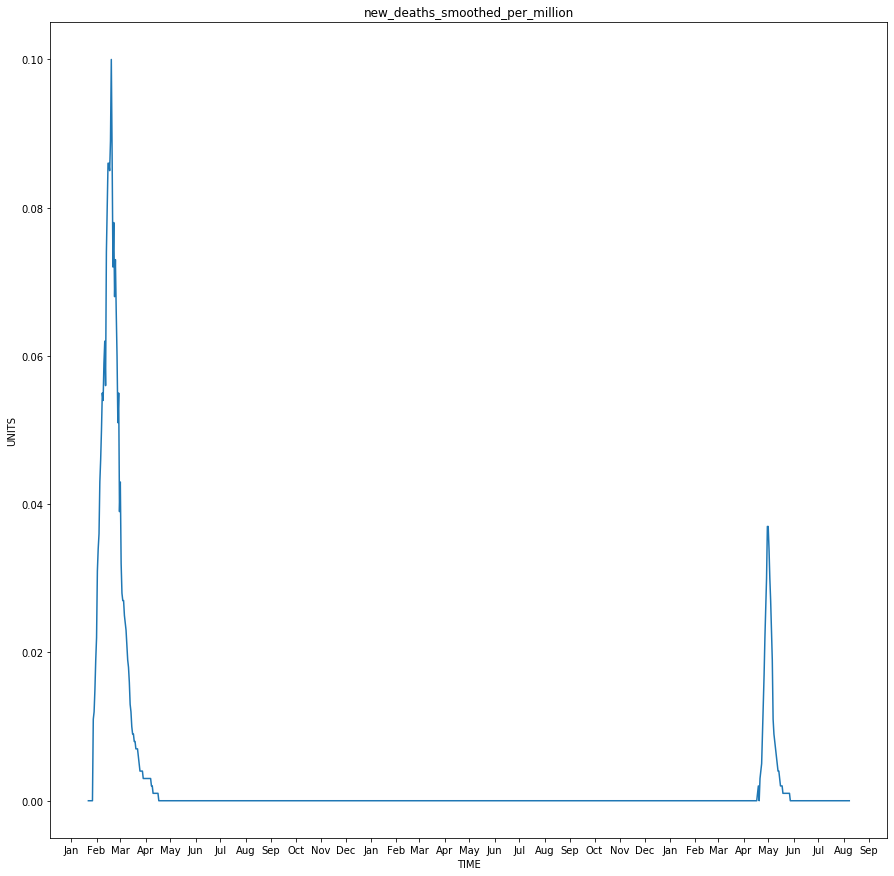

In [626]:
# china
x = china['date']
y = china['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

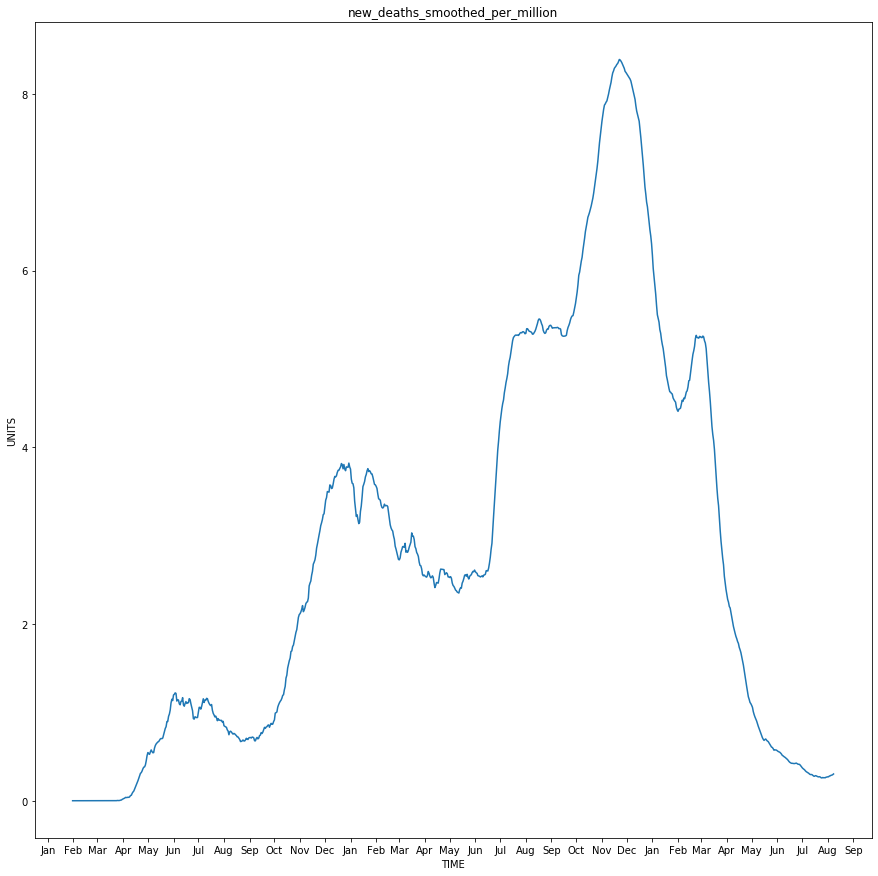

In [627]:
# russia
x = russia['date']
y = russia['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

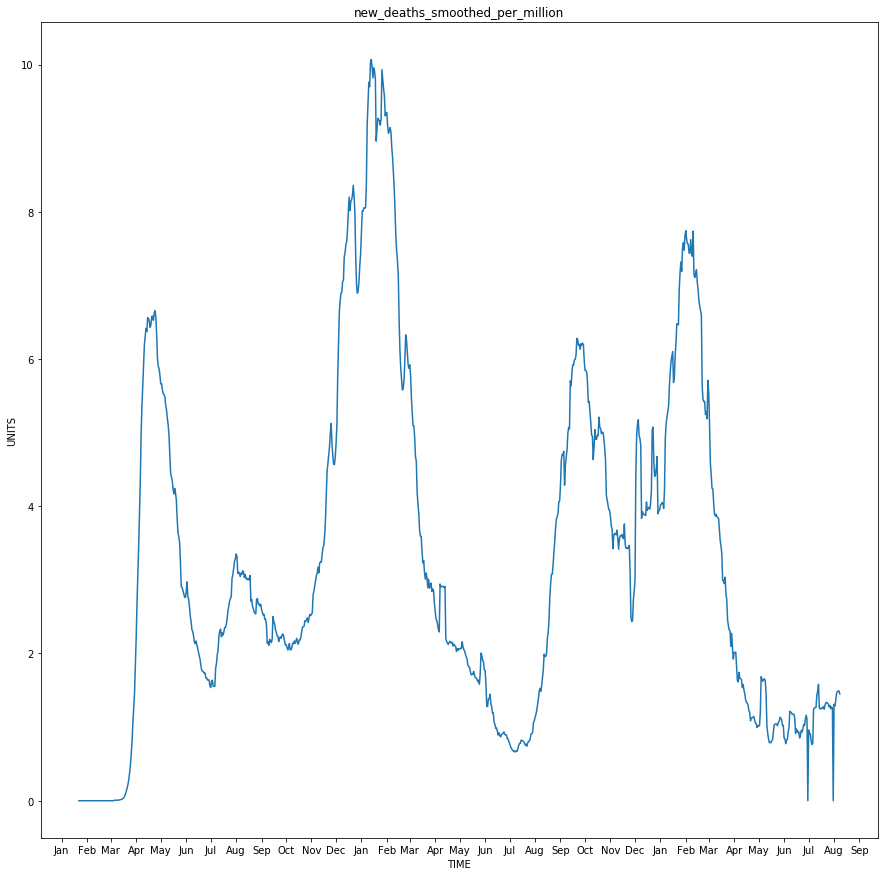

In [628]:
# united_states
x = united_states['date']
y = united_states['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

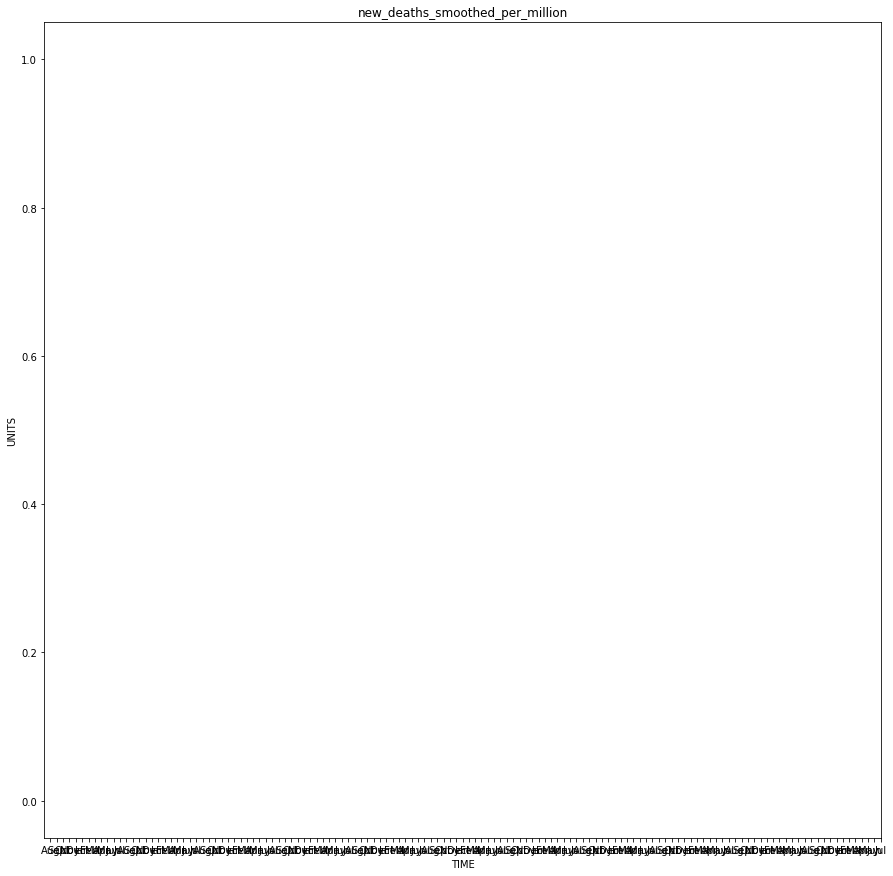

In [629]:
# brazil
x = brazil['date']
y = brazil['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

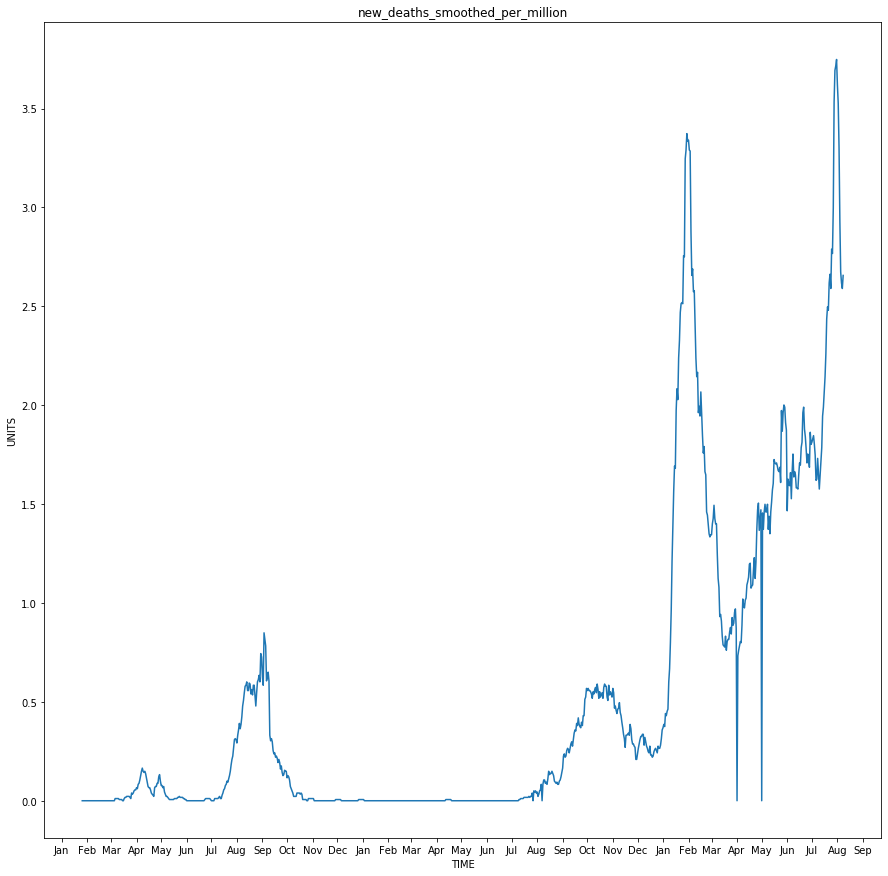

In [630]:
# australia
x = australia['date']
y = australia['new_deaths_smoothed_per_million']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_deaths_smoothed_per_million')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

# PLOT: new cases smoothed

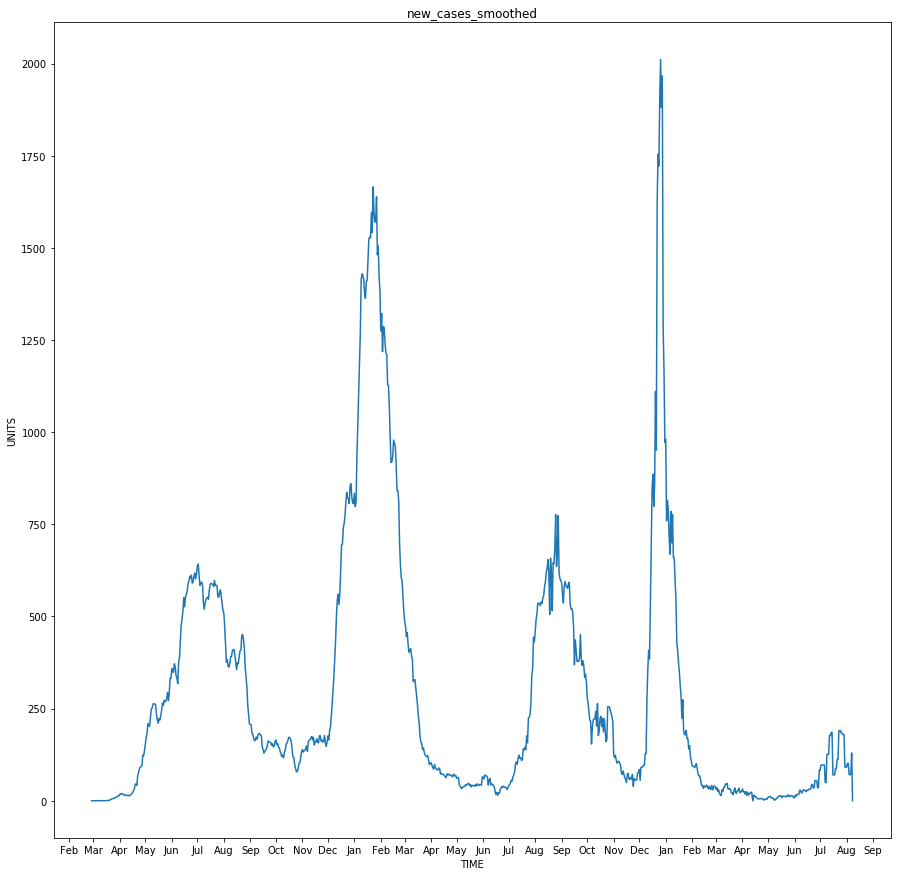

In [631]:
# nigeria
x = nigeria['date']
y = nigeria['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

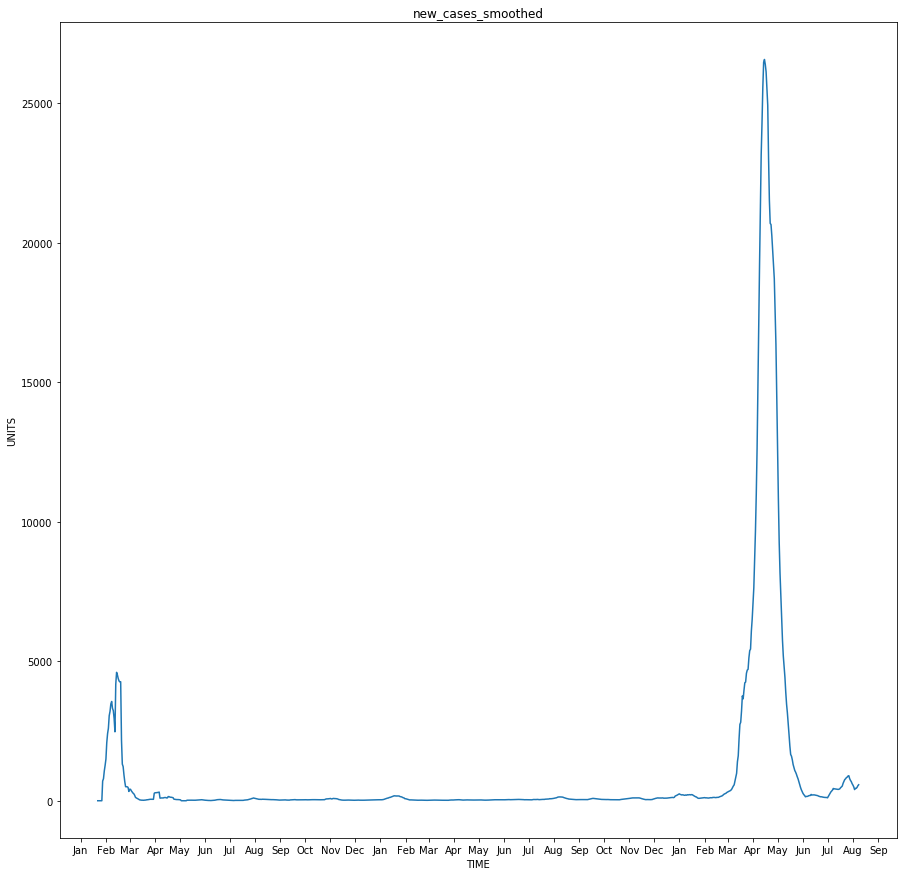

In [632]:
# china
x = china['date']
y = china['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

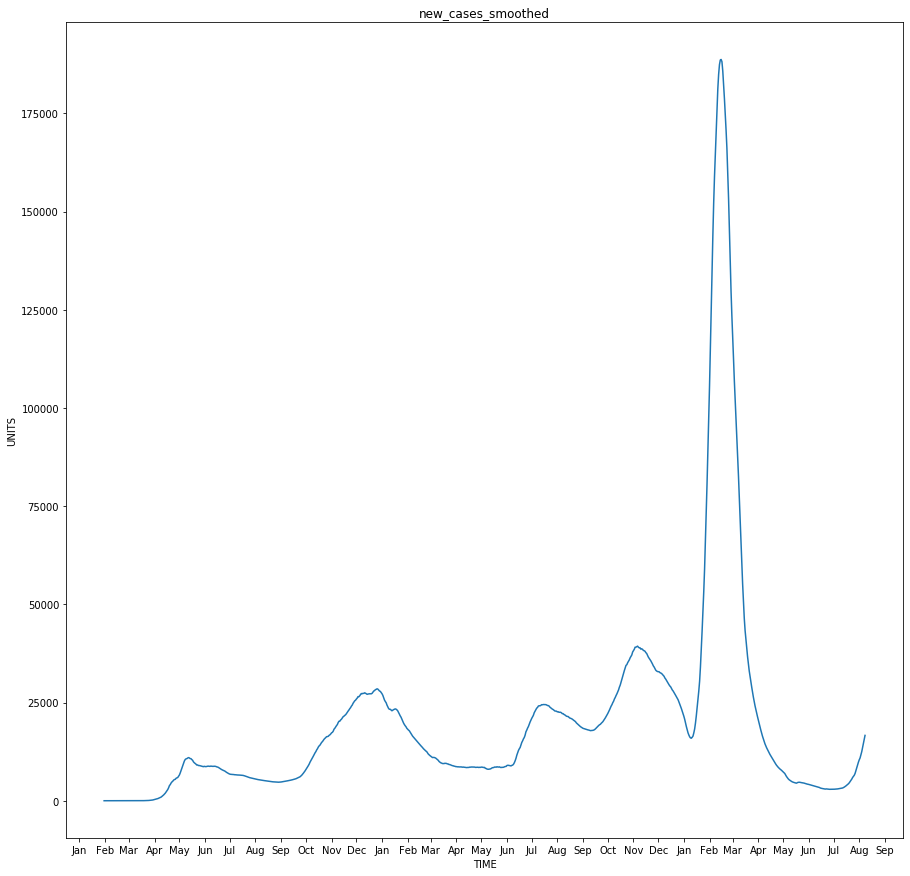

In [633]:
# russia
x = russia['date']
y = russia['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

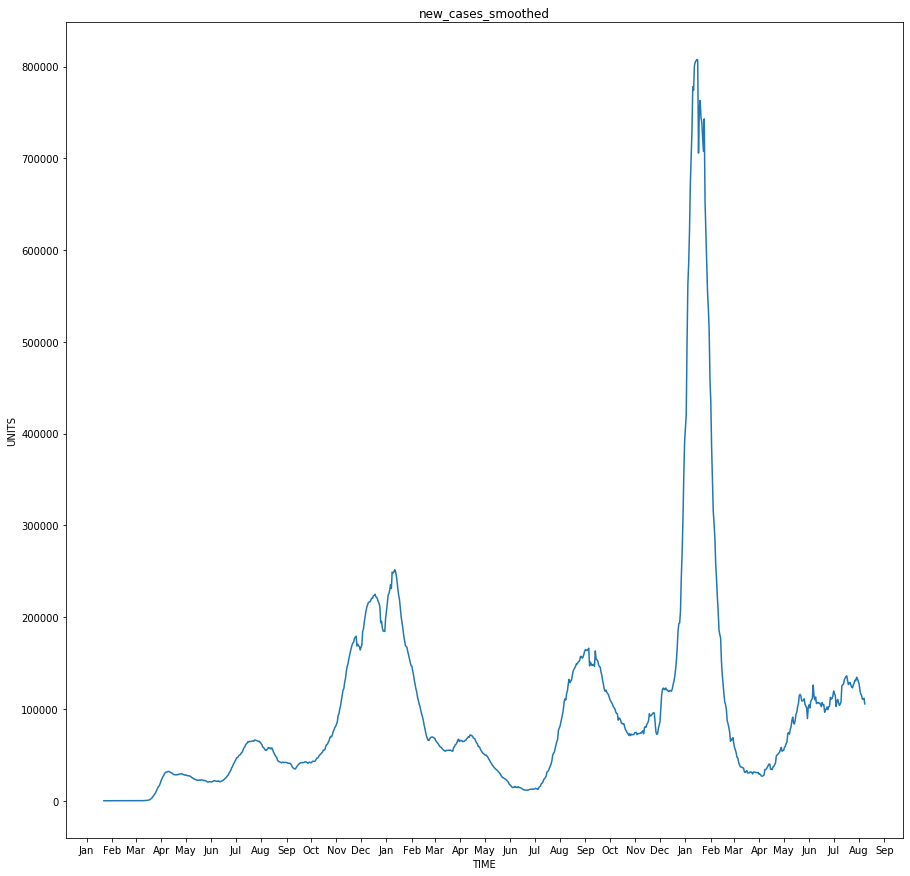

In [634]:
# united_states
x = united_states['date']
y = united_states['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

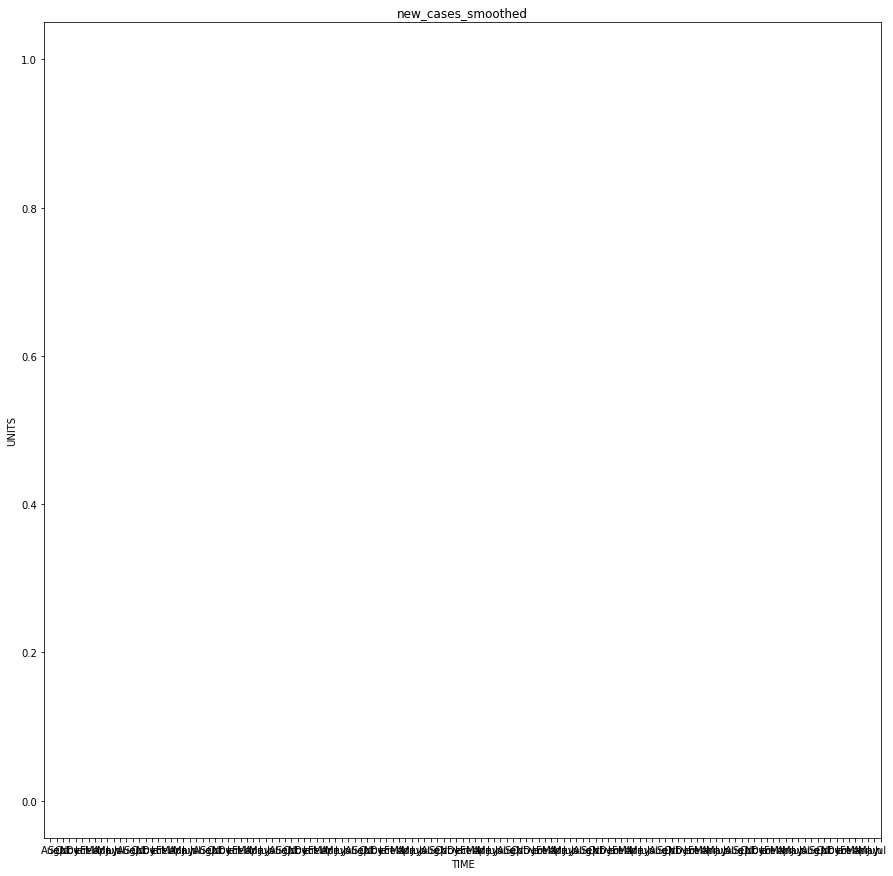

In [635]:
# brazil
x = brazil['date']
y = brazil['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

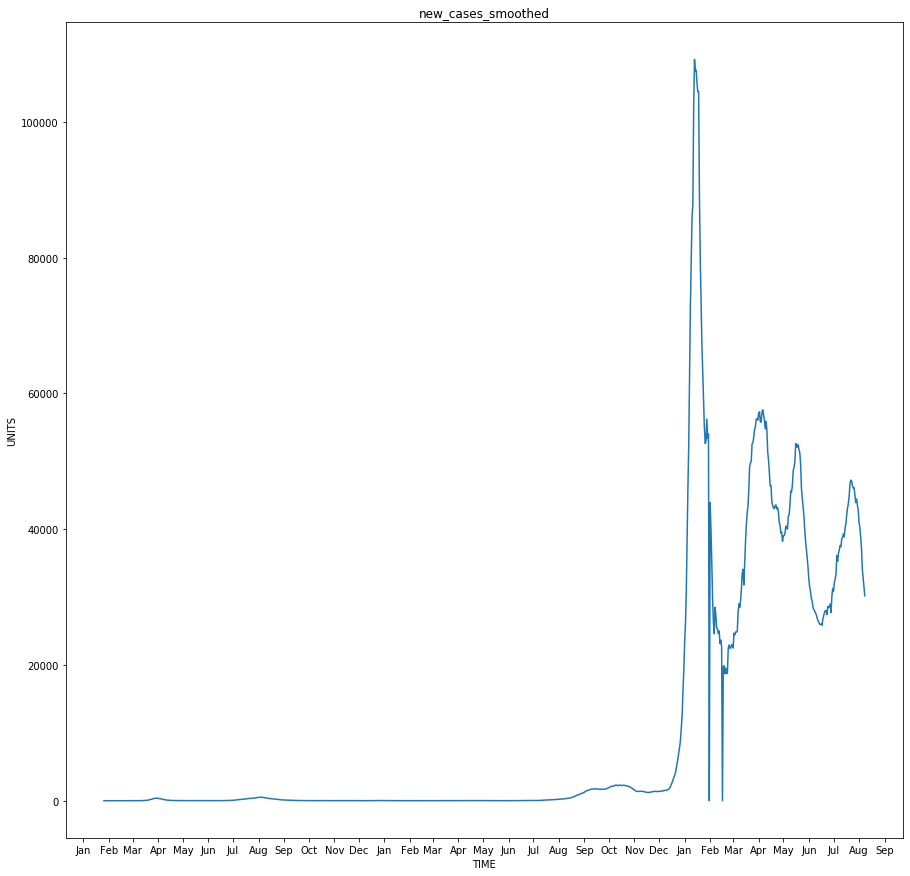

In [636]:
# australia
x = australia['date']
y = australia['new_cases_smoothed']
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(x,y)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

# PLOT: Both Deaths And Cases On The Same Chart

# -------------------------------------------------------------------------------------------
# Working Out How

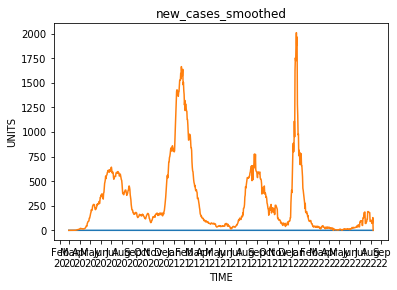

In [637]:
# nigeria
x = nigeria['date']
y = nigeria['new_deaths_smoothed_per_million']
fig, ax = plt.subplots()

ax.plot(x,y)

x = nigeria['date']
y_ncm = nigeria['new_cases_smoothed']

ax.plot(x,y_ncm)

ax.set_ylabel('UNITS')
ax.set_xlabel('TIME')
ax.set_title('new_cases_smoothed')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

plt.show()

Text(0, 0.5, 'DEATHS PER MILLION')

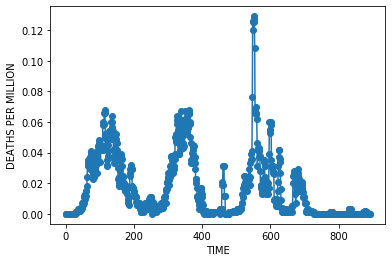

In [638]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

# make a plot
x = range(len(nigeria))
y = nigeria['new_deaths_smoothed_per_million']

ax.plot(x, y, marker = "o")

ax.set_xlabel('TIME')
ax.set_ylabel('DEATHS PER MILLION')

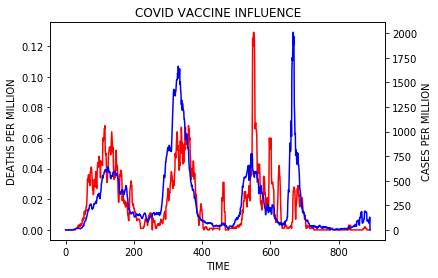

In [639]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

# make a plot
x = range(len(nigeria))
y1 = nigeria['new_deaths_smoothed_per_million']
y2 = nigeria['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
ax1.plot(x, y2, 'b-')

# ax = 'new_deaths_smoothed_per_million'
ax.plot(x, y1, 'r-')

plt.title('COVID VACCINE INFLUENCE')
ax.set_ylabel('DEATHS PER MILLION')
ax.set_xlabel('TIME')
ax1.set_ylabel('CASES PER MILLION')

plt.show()

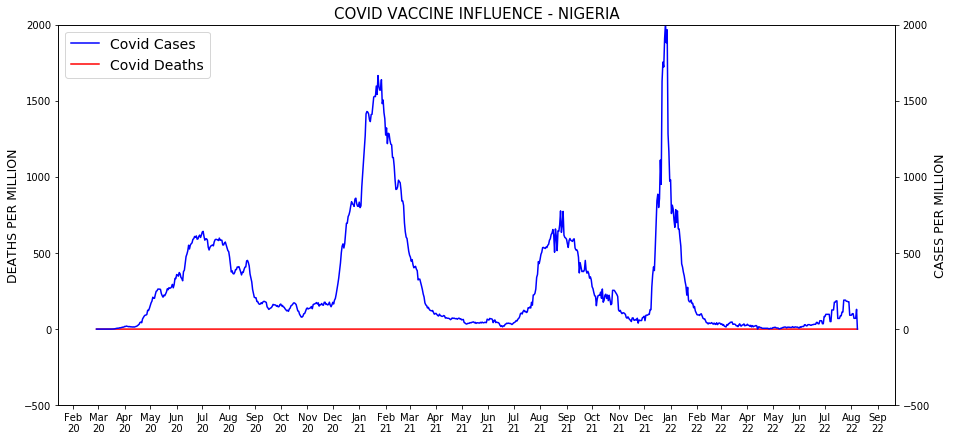

In [651]:
# NIGERIA
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = nigeria['date']
y1 = nigeria['new_deaths_smoothed_per_million']
y2 = nigeria['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - NIGERIA', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# same max and muin value on respective y axis's

ax1.set_ylim(ymin=-500, ymax=2000)
ax.set_ylim(ymin=-500, ymax=2000)

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - NIGERIA.png')

# -------------------------------------------------------------------------------------------

In [640]:
# When Was The Vaccine Avaliable For Each Country

# nigeria - March 2021 | 2021-03-15
# china - December 2020 | 2020-12-15 NOT COMPLETE
# russia - December 2020 | 2020-12-15
# united_states - December 2020 | 2020-12-13 
# brazil - Feburary 2021 | ?
# australia - Feburary 2021 | 2021-02-21

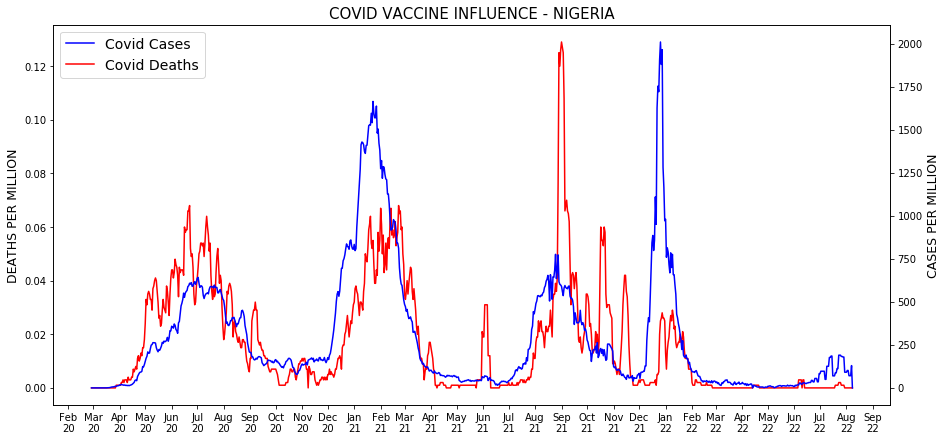

In [650]:
# NIGERIA
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = nigeria['date']
y1 = nigeria['new_deaths_smoothed_per_million']
y2 = nigeria['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - NIGERIA', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - NIGERIA.png')

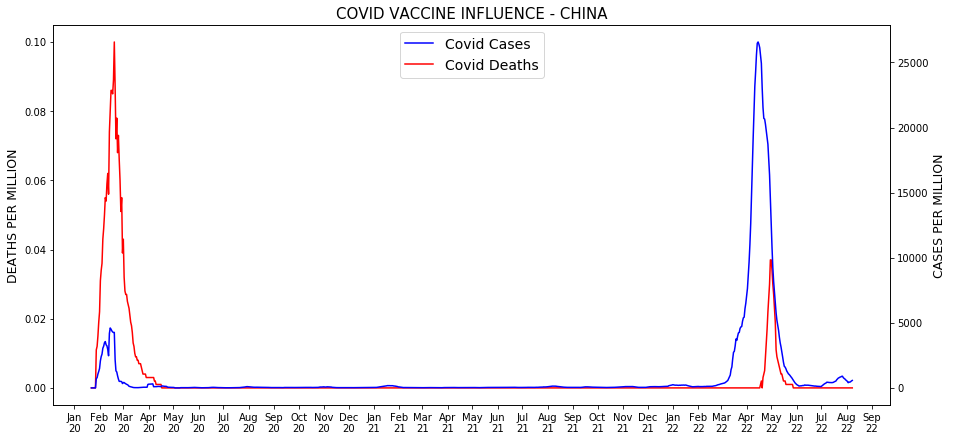

In [642]:
# CHINA
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = china['date']
y1 = china['new_deaths_smoothed_per_million']
y2 = china['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - CHINA', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=9, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - CHINA.png')

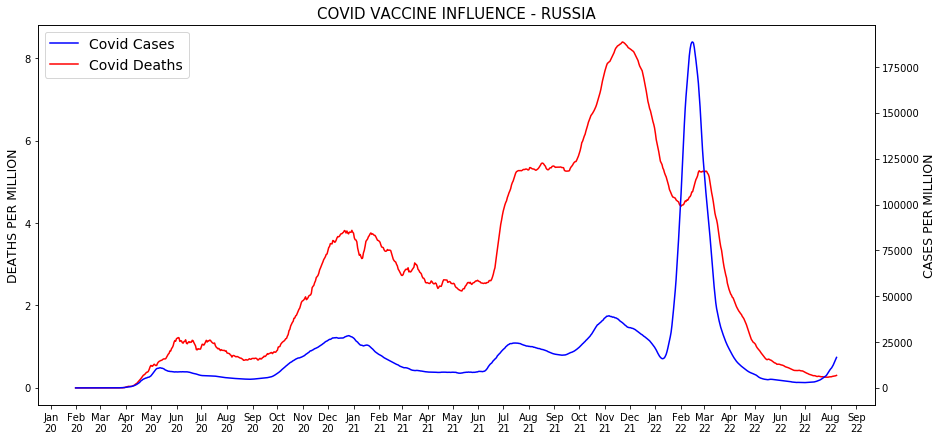

In [643]:
# RUSSIA
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = russia['date']
y1 = russia['new_deaths_smoothed_per_million']
y2 = russia['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - RUSSIA', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - RUSSIA.png')

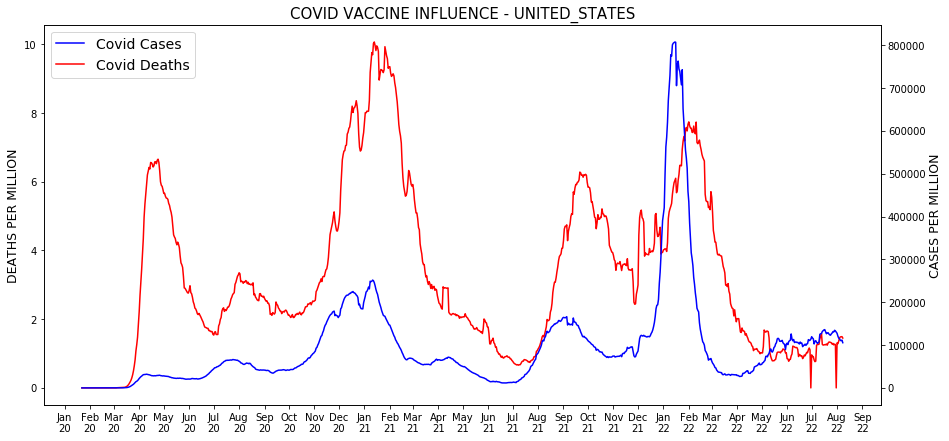

In [644]:
# UNITED_STATES
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = united_states['date']
y1 = united_states['new_deaths_smoothed_per_million']
y2 = united_states['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - UNITED_STATES', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - UNITED STATES.png')

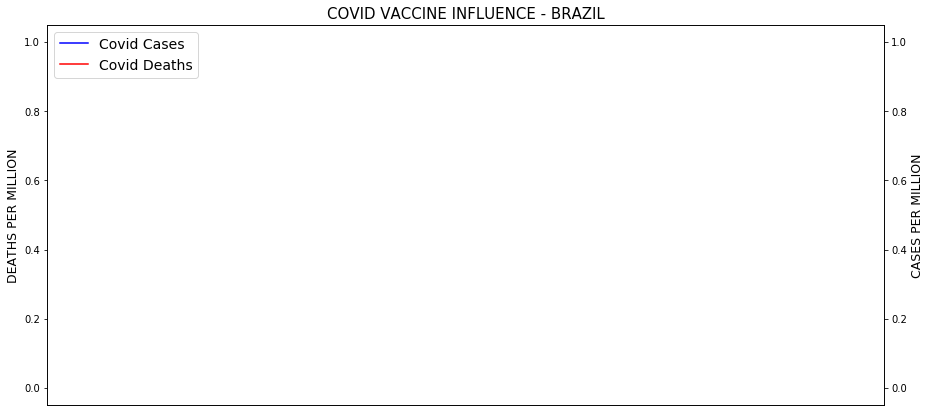

In [645]:
# BRAZIL
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = brazil['date']
y1 = brazil['new_deaths_smoothed_per_million']
y2 = brazil['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - BRAZIL', fontsize = 15)
ax1.set_ylabel('CASES PER MILLION', fontsize = 12.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 12.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - BRAZIL.png')

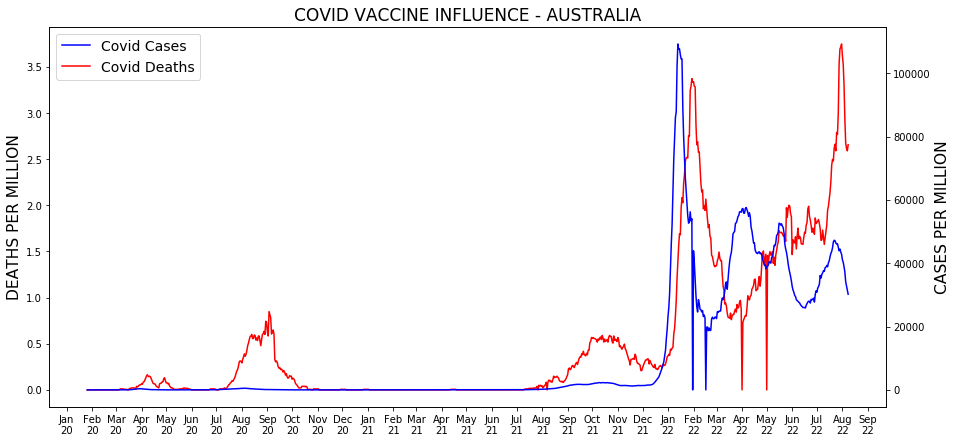

In [646]:
# AUSTRALIA
# Plot two lines with different scales on the same plot

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(15,7))

# make a plot
x = australia['date']
y1 = australia['new_deaths_smoothed_per_million']
y2 = australia['new_cases_smoothed']

# twin object for two different y-axis on the sample plot
ax1 = ax.twinx()

# ax1 = 'new_cases_smoothed'
cases = ax1.plot(x, y2, 'b-', label='Covid Cases')

# ax = 'new_deaths_smoothed_per_million'
deaths = ax.plot(x, y1, 'r-', label='Covid Deaths')

plt.title('COVID VACCINE INFLUENCE - AUSTRALIA', fontsize = 17)
ax1.set_ylabel('CASES PER MILLION', fontsize = 15.5)
ax.set_ylabel('DEATHS PER MILLION', fontsize = 15.5)
ax.set_xlabel('')

# Display x axis ('TIME') as Months and Years
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

# Create a legend for the chart
# Solution for having two legends
covid = cases + deaths
pandemic = [l.get_label() for l in covid]
ax1.legend(covid, pandemic, loc=2, prop={'size': 14})

plt.show()
fig.savefig('COVID VACCINE INFLUENCE - AUSTRALIA.png')